<a href="https://colab.research.google.com/github/WaseemAkram10000/Internship-Projects/blob/main/Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Load and preprocess the dataset
df = pd.read_csv('emails.csv')
df = df.drop(columns=['Email No.'])
X = df.drop(columns=['Prediction'])
y = df['Prediction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Define classifiers and parameter grids
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
}


In [ ]:
# Function to perform Grid Search
def tune_hyperparameters_grid(classifier, param_grid, X_train, y_train):
    print(f"Performing Grid Search for {classifier.__class__.__name__}...")
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best score: {grid_search.best_score_}\n")
    return grid_search.best_estimator_

In [ ]:
# Function to perform Random Search
def tune_hyperparameters_random(classifier, param_grid, X_train, y_train, n_iter=10):
    print(f"Performing Random Search for {classifier.__class__.__name__}...")
    random_search = RandomizedSearchCV(estimator=classifier, param_distributions=param_grid, n_iter=n_iter, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
    random_search.fit(X_train, y_train)
    print(f"Best parameters: {random_search.best_params_}")
    print(f"Best score: {random_search.best_score_}\n")
    return random_search.best_estimator_

In [ ]:
# Tune hyperparameters for each classifier using Grid Search and Random Search
best_estimators = {}
for name, classifier in classifiers.items():
    print(f"Tuning hyperparameters for {name} using Grid Search...")
    best_grid_estimator = tune_hyperparameters_grid(classifier, param_grids[name], X_train, y_train)
    best_estimators[f"{name} Grid"] = best_grid_estimator

    print(f"Tuning hyperparameters for {name} using Random Search...")
    best_random_estimator = tune_hyperparameters_random(classifier, param_grids[name], X_train, y_train, n_iter=10)
    best_estimators[f"{name} Random"] = best_random_estimator

Tuning hyperparameters for Logistic Regression using Grid Search...
Performing Grid Search for LogisticRegression...
Best parameters: {'C': 0.1, 'solver': 'liblinear'}
Best score: 0.9610813194773028

Tuning hyperparameters for Logistic Regression using Random Search...
Performing Random Search for LogisticRegression...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'solver': 'liblinear', 'C': 0.1}
Best score: 0.9610813194773028

Tuning hyperparameters for Decision Tree using Grid Search...
Performing Grid Search for DecisionTreeClassifier...
Best parameters: {'max_depth': 50, 'min_samples_split': 5}
Best score: 0.928208296093791

Tuning hyperparameters for Decision Tree using Random Search...
Performing Random Search for DecisionTreeClassifier...
Best parameters: {'min_samples_split': 10, 'max_depth': 20}
Best score: 0.9262733002704613

Tuning hyperparameters for Random Forest using Grid Search...
Performing Grid Search for RandomForestClassifier...
Best parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}
Best score: 0.9741335599834102

Tuning hyperparameters for Random Forest using Random Search...
Performing Random Search for RandomForestClassifier...
Best parameters: {'n_estimators': 300, 'min_samples_split': 5, 'max_depth': 30}
Best score: 0.9729261225896524



In [ ]:
# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, predictions)
    return accuracy, precision, recall, f1, mae, rmse, r2


In [ ]:
# Evaluate each best estimator
results = {}
for name, estimator in best_estimators.items():
    results[name] = evaluate_model(estimator, X_test, y_test)

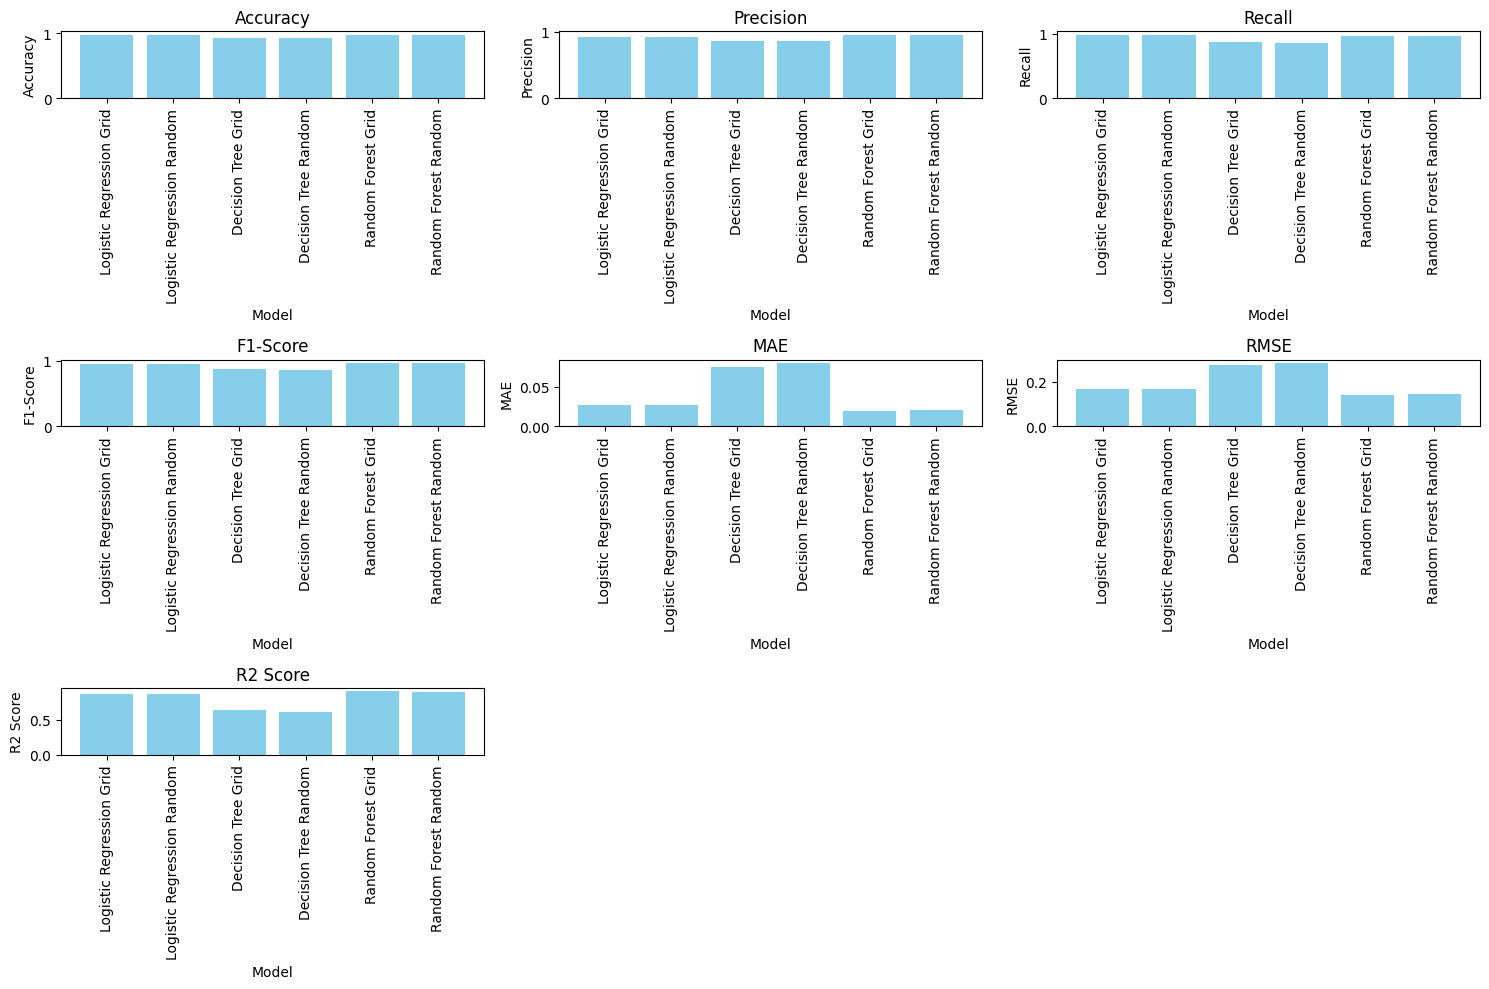

In [ ]:
# Plot the evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'MAE', 'RMSE', 'R2 Score']
scores = {metric: [] for metric in metrics}
for name, result in results.items():
    for metric, score in zip(metrics, result):
        scores[metric].append((name, score))

plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics):
    plt.subplot(3, 3, i+1)
    plt.bar([x[0] for x in scores[metric]], [x[1] for x in scores[metric]], color='skyblue')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.title(metric)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()